<ul><font size = 5 color='Orange'>
Learning Goals</font>
<font color = 'Orange'><li>Understand the structure of a web page.</li>
<li>Understand how to use Beautiful soup to scrape content from web pages.</li>
<li>Feel comfortable storing and manipulating the content in various formats.</li>
<li>Understand how to convert structured format into a Pandas DataFrame.</li>
</font>
</ul>

<font size = 4 color = "green">For this homework your job is to find a web-site from which you will extract the data, we are suggestioning for a local-site like time.mk, sitel.mk, vecer.mk, panacea.mk, reklama5.mk, etc. Accordinly with the choice you've made make a quick summary why did you use especially this web-site and what is the part of interest.</font>

#<font color = 'Orange'>Explain the Web-site that you will be using in this homework.</font>

In the following text-box answer the questions:
<li>What data you will be extracting and why?</li>

<li>Add a screenshot of the web-site that you will be scraping</li>



Ќе екстрактирам податоци за Машини за перење на алишта од setec.mk поради тоа што сакам да направам анализа на цените, достапноста, попустите и споредба помеѓу нивната редовна цена и клуб цена.

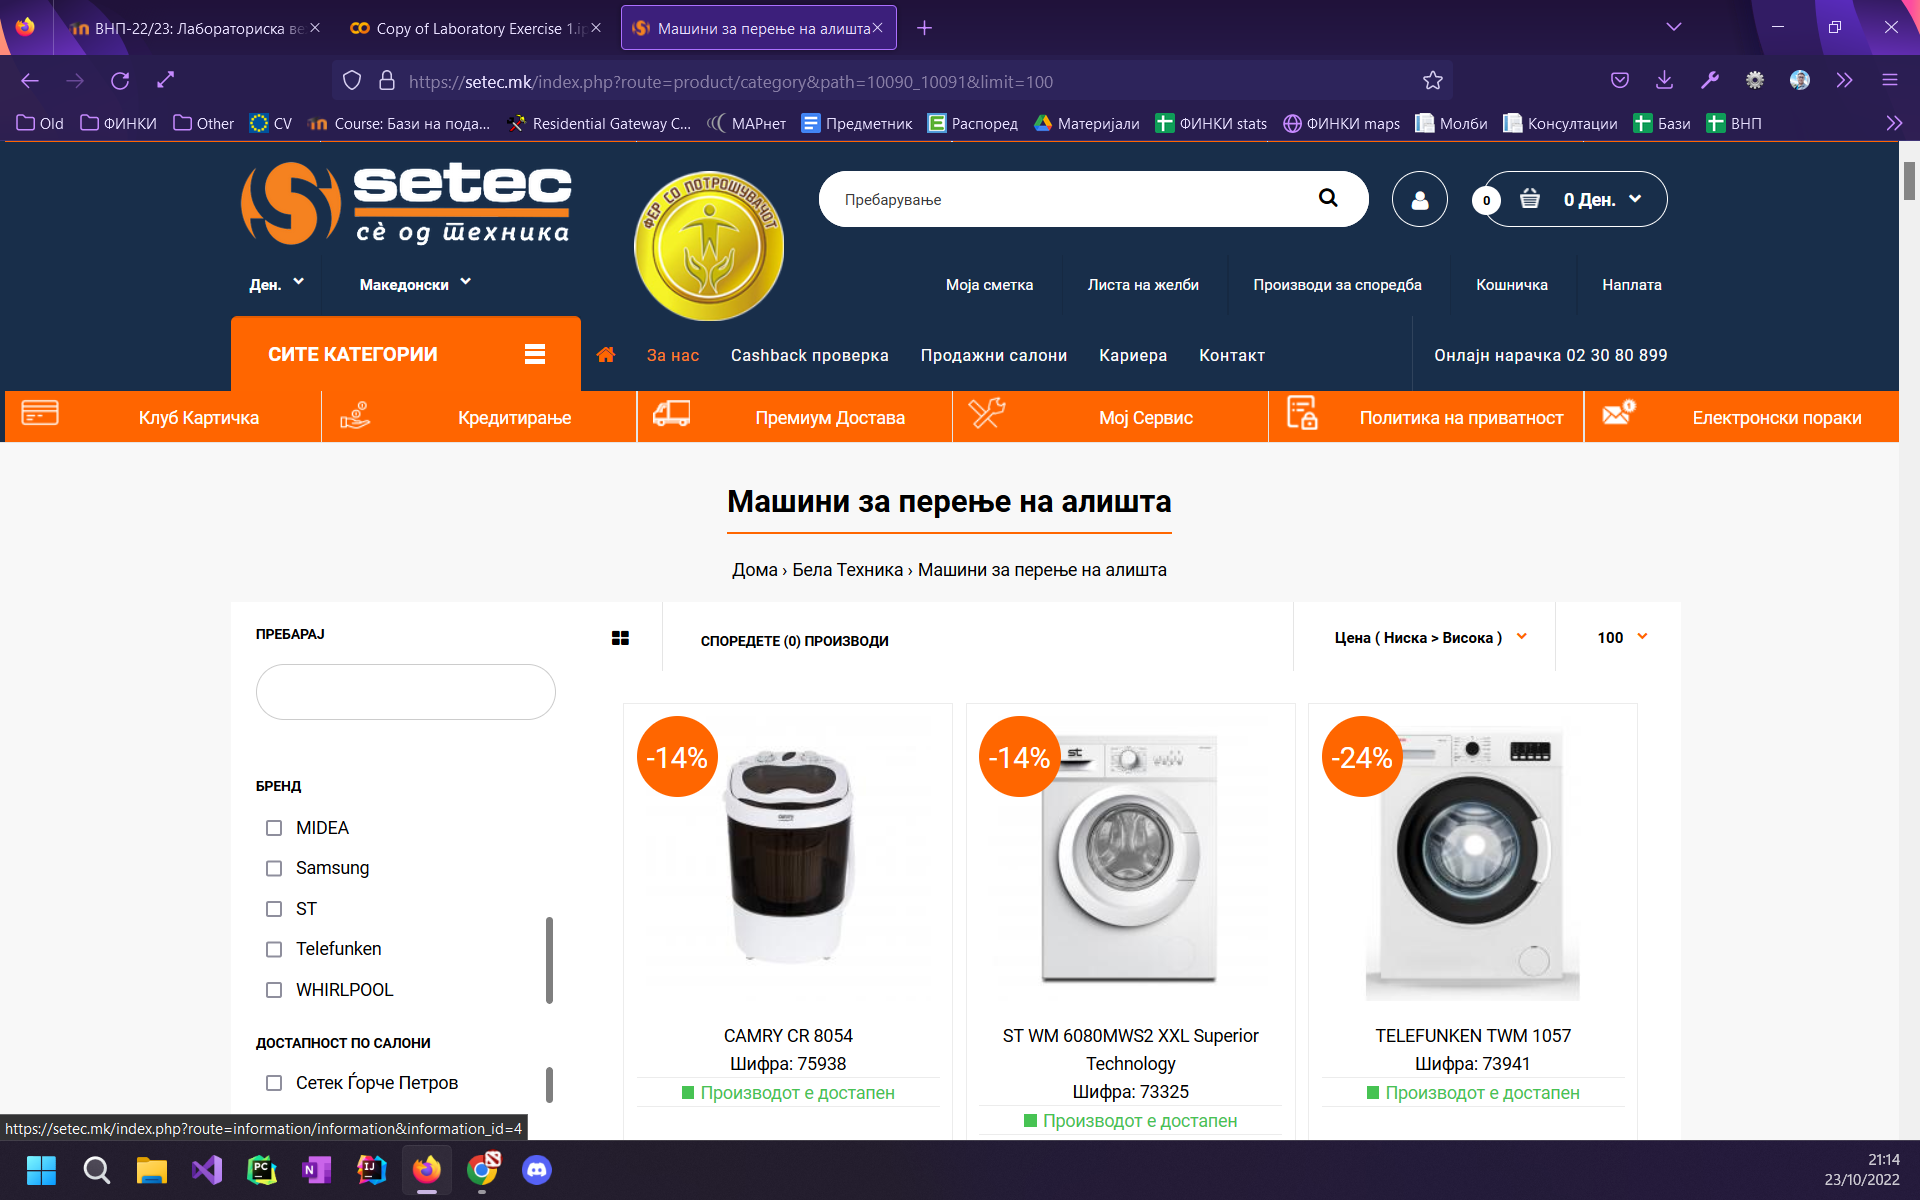

# <font color='Orange'>Requirements specified for Web Scraping</font>


Import all libraries and modules that you are going to use.

In [ ]:
#start here
#shift+enter in this box will run the code that's here and open a new code-box below
#import ....
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
from IPython.display import HTML
import warnings

# <font color = 'Orange'> Start the scraping by sending HTTP request</font> 

 **Fetch a website's content - send request**

In [ ]:
#add your code
requests.packages.urllib3.disable_warnings()
warnings.filterwarnings('ignore')

snapshot_url = "https://setec.mk/index.php?route=product/category&path=10090_10091&limit=100"

**Get the response-status code and see:**
<li>If the code starts with a 2, it means the request was successful.



In [ ]:
#add your code

snapshot = requests.get(snapshot_url)
snapshot

<Response [200]>

# <font color = 'orange'>Parse the HTML with BeautifulSoup</font>

Beautiful Soup is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. It commonly saves programmers hours or days of work. 


**Parse using BeautifulSoap**




In [ ]:
#add your code
raw_html = snapshot.text
soup = BeautifulSoup(raw_html,'html.parser')

**Print the HTML code that you get**

In [ ]:
#add your code
print(soup)

<!DOCTYPE html>
 <html class="responsive" lang="mk"> <head> <title>Машини за перење на алишта</title> <meta content="1200" property="og:image:width"/> <meta content="630" property="og:image:height"/> <meta content="image/jpeg" property="og:image:type"/> <meta content="Машини за перење на алишта" property="og:title"/> <meta content="product" property="og:type"/> <meta content="https://www.setec.mk/image/catalog/Promo/setec_logo_modal.jpg" property="og:image"/> <meta content="Сетек | Сè од техника" name="description" property="og:description"/> <meta content="Машини за перење на алишта" name="keywords"/> <base href="https://setec.mk/"/> <meta charset="utf-8"/> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=device-width, initial-scale=1.0" name="viewport"/> <meta content="Машини за перење на алишта" name="description"/> <meta content="Машини за перење на алишта" name="keywords"/> <link href="https://setec.mk/index.php?route=product/category&amp;path=10091" rel

# <font color='Orange'>Extracting data</font>

From the printed HTML code search for the data you need for building the dataset, find the classes for groupby option.

**In the following text-box write the attributes you are going to use**

<font color='red'> You need to extract a minimum of four features (lists/columns) from the web site (example: titles, posting time, comments, likes, ...)</font>

names, codes, regular_prices, club_prices, in_stocks, discounts, images, payment12x, payment24x

`add your attributes here for building the dataset`

**Try to select the first element from your attributes. Find out from the html code what part do you need.**

In [ ]:
#add your code
card_name = soup.select_one(".name")
HTML(card_name.prettify())

print(card_name.select_one("a").text.strip())

CAMRY CR 8054


**Add as many codeboxes as you need for selecting all the html elements**

In [ ]:
#add your code
card_names = soup.select(".name")
card_codes = soup.select(".shifra")
# card_regular_prices = soup.select(".category-price-redovna")
# card_club_prices = soup.select(".category-price-akciska")
card_prices = soup.select(".cena-bace-cena-druze")
card_discounts = soup.select(".left")
card_in_stocks = soup.select(".lager") 
card_images = soup.select(".zoom-image-effect")

card_installment_payments = soup.find_all("div", {"id" : "category-rata"})


**Create lists with the extracted data from the html elements that you selected**

In [ ]:
names = []
for name in card_names:
  names.append(name.select_one("a").text.strip())
len(names)
names

['CAMRY CR 8054',
 'ST WM 6080MWS2 XXL Superior Technology',
 'TELEFUNKEN TWM 1057',
 'MIDEA MFN70-S1405 / C31E-EU(A3) NEBULA',
 'ST WM 7100MWS2 XXL Superior Technology',
 'INDESIT EWC 71252',
 'TELEFUNKEN TWM 1057V',
 'TELEFUNKEN TWM 1059',
 'INDESIT EWSC 61251 W',
 'MIDEA MFN80-S1405 / C33E-EU(A3) NEBULA',
 'ST WM 8120MW XXL Superior Technology',
 'TELEFUNKEN TWM 1058',
 'ST WM 9120MW XXL Superior Technology',
 'INDESIT BWA 71252 X W EU',
 'INDESIT EWC 81483',
 'INDESIT MTWSE 61252 W EE',
 'MIDEA MFN90-S1205',
 'INDESIT MTWE 71252 W EE',
 'Gorenje WHP62ES',
 'INDESIT MTWA 81283 W EE',
 'MIDEA MFE65-T1211 / F01-EU (A3)',
 'TELEFUNKEN TWMI 10707B',
 'WHIRLPOOL FFL 7238 W EE',
 'WHIRLPOOL TDLR 55020S EU / N',
 'WHIRLPOOL TDLR 6030L',
 'INDESIT BTW L50300 EU / N',
 'INDESIT BTW L60300 EE / N',
 'INDESIT BWE 71283 X WS EE N',
 'MIDEA LUNAR MF100W70W / W-MK',
 'SAMSUNG WW81T301MWW / LE',
 'WHIRLPOOL FFB 8248 WV EE',
 'Gorenje WHP74ES',
 'Electrolux EW6T4262I',
 'INDESIT BTW S60300 EU / N',

In [ ]:
codes = []
for code in card_codes:
  codes.append(code.text.strip()[7:])
len(codes)
codes

['75938',
 '73325',
 '73941',
 '73173',
 '73326',
 '75147',
 '75631',
 '73943',
 '74574',
 '73174',
 '73327',
 '73942',
 '73328',
 '69763',
 '74625',
 '73786',
 '74893',
 '73785',
 '73980',
 '73535',
 '73230',
 '75695',
 '60591',
 '73776',
 '73773',
 '73778',
 '75408',
 '74657',
 '75522',
 '74358',
 '60564',
 '73956',
 '74072',
 '74279',
 '73536',
 '73329',
 '75747',
 '60592',
 '75410',
 '75111',
 '75630',
 '75409',
 '75523',
 '60762',
 '74658',
 '30586',
 '73787',
 '73777',
 '75521',
 '60663',
 '73797',
 '75798',
 '72877',
 '60593',
 '73788',
 '73774',
 '74807',
 '75519',
 '60563',
 '75112',
 '74808',
 '75520',
 '73798',
 '74659',
 '74281',
 '75559',
 '73781',
 '74024',
 '75591',
 '60671',
 '60670',
 '75357',
 '75358',
 '75779',
 '74872',
 '73083',
 '75560',
 '74190',
 '74858',
 '73799',
 '73780',
 '75941',
 '73775',
 '75689',
 '72569',
 '75676',
 '72620',
 '60697',
 '74022',
 '74189',
 '75495',
 '75590',
 '75359',
 '73783',
 '75375',
 '73779',
 '73800',
 '74020',
 '75674',
 '74019']

In [ ]:
regular_prices = []
club_prices = []

# for regular_price,club_price in zip(card_regular_prices, card_club_prices):
#   if regular_price.select_one(".redovna-cena").text == "Редовна цена: ":
#     if (regular_price.select_one(".price-old-new") != None):
#       regular_prices.append(regular_price.select_one(".price-old-new").text)
#     else:
#       regular_prices.append(regular_price.select_one(".cena_za_kesh").text)
#   else:
#     club_price.append(regular_price.select_one(".price-old-new").text)
#     print(regular_price)
#   if club_price.select_one(".akciska-cena").text == "КЛУБ ЦЕНА: ":
#     club_prices.append(club_price.select_one(".price-new-new").text)


for price in card_prices:
  regular_price = price.select(".category-price-redovna")
  club_price = price.select_one(".category-price-akciska")
  if len(regular_price) == 1:
    regular = regular_price[0]
    if (regular.select_one(".price-old-new") != None):
      regular_prices.append(float(regular.select_one(".price-old-new").text.strip()[:-5].replace(",","")))
    else:
      regular_prices.append(float(regular.select_one(".cena_za_kesh").text.strip()[:-5].replace(",","")))
  else:
    regular = regular_price[0]
    club = regular_price[1]
    regular_prices.append(float(regular.select_one(".price-old-new").text.strip()[:-5].replace(",","")))
    club_prices.append(float(club.select_one(".price-old-new").text.strip()[:-5].replace(",","")))
    continue
  if (club_price != None):
    club_prices.append(float(club_price.select_one(".price-new-new").text.strip()[:-5].replace(",","")))
  else:
     club_prices.append("No Club Price")


print(len(club_prices))
print(len(regular_prices))


100
100


In [ ]:
in_stocks = []

for in_stock in card_in_stocks:

  if (in_stock.select_one(".ima_zaliha") != None):
    # in_stocks.append(in_stock.select_one(".ima_zaliha").text.strip())
    in_stocks.append(True)
  else:
    # in_stocks.append(in_stock.select_one(".nema_zaliha").text.strip())
    in_stocks.append(False)

print(len(in_stocks))


100


In [ ]:
discounts = []

for discount in card_discounts:
  if discount.select_one(".sale") != None:
    discounts.append(float(discount.select_one(".sale").text[:-1].replace("-",""))*0.01)
  else:
    discounts.append(0)

len(discounts)
discounts

[0.14,
 0.14,
 0.24,
 0.21,
 0.1,
 0.18,
 0.2,
 0.3,
 0.05,
 0.19,
 0.06,
 0.21,
 0.06,
 0.16,
 0.11,
 0.16,
 0.16,
 0.21,
 0.05,
 0.18,
 0.1,
 0.05,
 0.18,
 0.18,
 0.14,
 0.1,
 0.14,
 0.1,
 0.05,
 0.17,
 0.22,
 0.09,
 0.26,
 0.13,
 0.13,
 0.13,
 0.05,
 0.11,
 0.05,
 0.13,
 0.09,
 0.13,
 0.13,
 0.09,
 0.16,
 0.08,
 0.08,
 0.08,
 0.1,
 0.12,
 0.18,
 0.17,
 0.15,
 0.15,
 0.08,
 0.15,
 0.08,
 0.04,
 0.08,
 0.08,
 0.11,
 0.04,
 0.19,
 0.08,
 0.11,
 0.17,
 0.14,
 0.07,
 0.18,
 0.04,
 0.11,
 0.06,
 0.07,
 0.25,
 0.07,
 0.15,
 0.15,
 0.18,
 0.07,
 0,
 0.13,
 0.2,
 0.09,
 0.06,
 0.12,
 0.14,
 0.14,
 0.14,
 0.16,
 0.09,
 0.11,
 0.07,
 0.06,
 0.15,
 0.05,
 0.08,
 0.04,
 0.16,
 0.12,
 0.16]

In [ ]:
images = []

for image in card_images:
  images.append(image['src'].strip())

len(images)

100

In [ ]:
payment12x = []
payment24x = []
for installment_payment in card_installment_payments:
  # print(installment_payment)
  payments = installment_payment.select(".klub-rata-suma")
  
  payment12x.append(float(payments[0].text.strip()[:-5].replace(",","")))
  payment24x.append(float(payments[1].text.strip()[:-5].replace(",","")))
print(len(payment24x))

100


**Print all lists that are containing the elements**

In [ ]:
#add your code
print(names)
print(codes)
print(regular_prices)
print(club_prices)
print(in_stocks)
print(discounts)
print(images)
print(payment12x)
print(payment24x)

['CAMRY CR 8054', 'ST WM 6080MWS2 XXL Superior Technology', 'TELEFUNKEN TWM 1057', 'MIDEA MFN70-S1405 / C31E-EU(A3) NEBULA', 'ST WM 7100MWS2 XXL Superior Technology', 'INDESIT EWC 71252', 'TELEFUNKEN TWM 1057V', 'TELEFUNKEN TWM 1059', 'INDESIT EWSC 61251 W', 'MIDEA MFN80-S1405 / C33E-EU(A3) NEBULA', 'ST WM 8120MW XXL Superior Technology', 'TELEFUNKEN TWM 1058', 'ST WM 9120MW XXL Superior Technology', 'INDESIT BWA 71252 X W EU', 'INDESIT EWC 81483', 'INDESIT MTWSE 61252 W EE', 'MIDEA MFN90-S1205', 'INDESIT MTWE 71252 W EE', 'Gorenje WHP62ES', 'INDESIT MTWA 81283 W EE', 'MIDEA MFE65-T1211 / F01-EU (A3)', 'TELEFUNKEN TWMI 10707B', 'WHIRLPOOL FFL 7238 W EE', 'WHIRLPOOL TDLR 55020S EU / N', 'WHIRLPOOL TDLR 6030L', 'INDESIT BTW L50300 EU / N', 'INDESIT BTW L60300 EE / N', 'INDESIT BWE 71283 X WS EE N', 'MIDEA LUNAR MF100W70W / W-MK', 'SAMSUNG WW81T301MWW / LE', 'WHIRLPOOL FFB 8248 WV EE', 'Gorenje WHP74ES', 'Electrolux EW6T4262I', 'INDESIT BTW S60300 EU / N', 'INDESIT MTWE 91483 WK EE', 'MID

**Check if all lists are the same size**

In [ ]:
#add your code
list_of_lists = [names,codes,regular_prices,club_prices,in_stocks,discounts,images,payment12x,payment24x]
for list in list_of_lists:
  print(len(list))

result = [ [len(x) == len(y) for y in list_of_lists ] for x in list_of_lists]

print(result)

100
100
100
100
100
100
100
100
100
[[True, True, True, True, True, True, True, True, True], [True, True, True, True, True, True, True, True, True], [True, True, True, True, True, True, True, True, True], [True, True, True, True, True, True, True, True, True], [True, True, True, True, True, True, True, True, True], [True, True, True, True, True, True, True, True, True], [True, True, True, True, True, True, True, True, True], [True, True, True, True, True, True, True, True, True], [True, True, True, True, True, True, True, True, True]]


# <font color='Orange'>Create a Pandas DataFrame</font> 


**Create the DataFrame from the lists you get and name your *Columns***

In [ ]:
#add your code
# names,codes,regular_prices,club_prices,in_stocks,discounts,images,payment12x,payment24x
matrix = []

for i in range(0, len(names)):
  node = {}
  node['Name'] = names[i]
  node['Code'] = codes[i]
  node['In Stock?'] = in_stocks[i]
  node['Discount'] = discounts[i]
  node['Regular Price'] = regular_prices[i]
  node['Club Price'] = club_prices[i]
  node['12x Installements'] = payment12x[i]
  node['24x Installements'] = payment24x[i]
  node['Image Url'] = images[i]
  matrix.append(node)
matrix


[{'Name': 'CAMRY CR 8054',
  'Code': '75938',
  'In Stock?': True,
  'Discount': 0.14,
  'Regular Price': 6999.0,
  'Club Price': 5999.0,
  '12x Installements': 525.0,
  '24x Installements': 275.0,
  'Image Url': 'https://setec.mk/image/cache/catalog/Product/75938_0-228x228.jpg'},
 {'Name': 'ST WM 6080MWS2 XXL Superior Technology',
  'Code': '73325',
  'In Stock?': True,
  'Discount': 0.14,
  'Regular Price': 14499.0,
  'Club Price': 12499.0,
  '12x Installements': 1094.0,
  '24x Installements': 573.0,
  'Image Url': 'https://setec.mk/image/cache/catalog/Product/73325_0-228x228.jpg'},
 {'Name': 'TELEFUNKEN TWM 1057',
  'Code': '73941',
  'In Stock?': True,
  'Discount': 0.24,
  'Regular Price': 16999.0,
  'Club Price': 12999.0,
  '12x Installements': 1138.0,
  '24x Installements': 596.0,
  'Image Url': 'https://setec.mk/image/cache/catalog/Product/73941_0-228x228.jpg'},
 {'Name': 'MIDEA MFN70-S1405 / C31E-EU(A3) NEBULA',
  'Code': '73173',
  'In Stock?': False,
  'Discount': 0.21,
  'R

**Print the dataset you obtain**

In [ ]:
#add your code

df = pd.DataFrame(matrix)
df

,Name,Code,In Stock?,Discount,Regular Price,Club Price,12x Installements,24x Installements,Image Url
0,CAMRY CR 8054,75938,True,0.14,6999.0,5999.0,525.0,275.0,https://setec.mk/image/cache/catalog/Product/7...
1,ST WM 6080MWS2 XXL Superior Technology,73325,True,0.14,14499.0,12499.0,1094.0,573.0,https://setec.mk/image/cache/catalog/Product/7...
2,TELEFUNKEN TWM 1057,73941,True,0.24,16999.0,12999.0,1138.0,596.0,https://setec.mk/image/cache/catalog/Product/7...
3,MIDEA MFN70-S1405 / C31E-EU(A3) NEBULA,73173,False,0.21,16999.0,13495.0,1181.0,619.0,https://setec.mk/image/cache/catalog/Product/7...
4,ST WM 7100MWS2 XXL Superior Technology,73326,True,0.10,14999.0,13499.0,1182.0,619.0,https://setec.mk/image/cache/catalog/Product/7...
...,...,...,...,...,...,...,...,...,...
95,SAMSUNG WW70T552DAX / S7,73779,True,0.08,39199.0,35999.0,3150.0,1650.0,https://setec.mk/image/cache/catalog/Product/7...
96,SAMSUNG WW80T552DAW / S7,73800,True,0.04,37599.0,35999.0,3150.0,1650.0,https://setec.mk/image/cache/catalog/Product/7...
97,SAMSUNG WW80T684DLH / S7,74020,True,0.16,42999.0,35999.0,3150.0,1650.0,https://setec.mk/image/cache/catalog/Product/7...
98,Electrolux EW8FN248B,75674,True,0.12,41999.0,36999.0,3238.0,1696.0,https://setec.mk/image/cache/catalog/Product/7...


# <font color = 'Green'>Advanced part</font>

<font color = 'orange'>This part is not mandatory and is intended for those who want to expand their knowledge in this field</font>

There are other libraries in Python that can be used to scrape a website. Some examples are Scrapy (https://scrapy.org/) and Selenium (https://selenium-python.readthedocs.io/).




## <font color = 'Green'>Extra task 1: Selenium</font> 
For the extra task you will need to take a look of the Selenium library. Here is a quick intro to this library and what features it has.

Selenium is a robust framework designed to automate tests for Web Applications. It provides a way for the developer to write tests in several popular programming languages such as C#, Java, Python, Ruby, etc. This framework is developed to perform browser automation. Selenium is an excellent choice when you want to deal with Core Javascript-based web Applications and make browser automation with AJAX/PJAX Requests.
 
View these links for more details: 

*   https://selenium-python.readthedocs.io/installation.html
*   https://selenium-python.readthedocs.io/getting-started.html
*   https://pypi.org/project/selenium-requests/
*   https://pypi.org/project/selenium-wire/

Starting code id given below.

<font color ="red"> During the laboratory exercise, will be defined which side and what will need to be extracted using Selenium library</font>



Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Get:12 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [96.6 kB]
Hit:13 http:
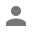
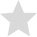
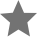
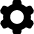
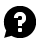
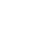
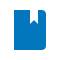
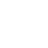
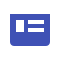
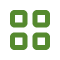
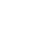
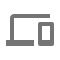
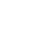
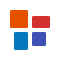
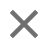
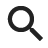
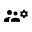
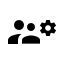
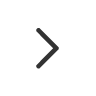
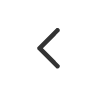
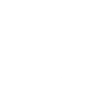
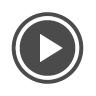
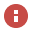
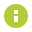
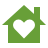
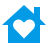
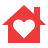
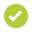
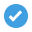
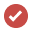

In [1]:
#requirements for colab
# install chromium, its driver, and selenium
!apt update
!apt install chromium-chromedriver
!pip install selenium
# set options to be headless, ..
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
# open it, go to a website, and get results
wd = webdriver.Chrome(options=options)
wd.get("https://play.google.com/store/movies?hl=en&gl=US")
print(wd.page_source)  # results
#divs = wd.find_element(By.TAG_NAME, 'div')

In [2]:
from selenium.webdriver.common.by import By
import pandas as pd
# open it, go to a website, and get results
wd = webdriver.Chrome(options=options)


In [4]:

wd.get("https://play.google.com/store/movies?hl=en&gl=US")

urls = wd.find_elements(By.XPATH, "//a[@class='Si6A0c ZD8Cqc']")
# print(urls)
all_titles = []
all_ratings = []
all_comments = []

for url in urls:
  
  url_link = url.get_attribute("href")
  inwd = webdriver.Chrome(options=options)
  inwd.get(url_link)
  print(url_link)

  # new_driver = url.click()

  title = inwd.find_element(By.XPATH, '//h1[@class="Fd93Bb ynrBgc xwcR9d"]')
  ratings = inwd.find_element(By.XPATH, '//div[@class="g1rdde"]')
  print(title.text)
  all_titles.append(title)
  print(ratings.text[:-8])
  all_ratings.append(int(ratings.text[:-8]))

  comment_list = []
  comments = inwd.find_elements(By.XPATH, '//div[@class="h3YV2d"]')
  for comment in comments:
    # print(comment.text)
    comment_list.append(comment.text)
    

  print("|||".join(comment_list))
  all_comments.append("|||".join(comment_list))

  wd.get("https://play.google.com/store/movies?hl=en&gl=US")





https://play.google.com/store/movies/details/Don_t_Worry_Darling?id=pckeqRD0Leo.P


NoSuchElementException: ignored